### Title
### Talent Fair Aria Dataset

### Introduction
### Xyla 

Dengan dataset yang telah diberikan saya akan memprediksi target dengan variabel yang telah diberikan dan membandingkan antara sample dari lab 1 dan lab 2

### External Link
- 

### Working Area

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import ast
import pickle

### Data Loading


In [2]:
df = pd.read_excel('aria_data.xlsx')
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


### Data Info & Description


In [3]:
#Checking information on DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


In [4]:
#Checking description of DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,160.0,4.733750,0.214050,4.130000,4.600000,4.720000,4.890000,5.260000
v1,160.0,389.892437,148.673511,227.285714,268.608333,295.162500,536.409375,678.375000
v2,160.0,237.442677,70.128690,178.800000,194.029018,204.187500,244.716667,422.812500
v3,160.0,480.573041,118.798984,348.933333,384.419643,414.383929,591.611404,722.312500
v4,160.0,394.109622,63.060442,313.733333,353.181250,370.741667,424.131250,558.500000
v5,160.0,487.316520,100.941711,373.333333,418.583333,456.031250,496.475000,721.000000
v6,160.0,251.450820,59.634652,189.200000,213.000000,226.062500,262.531250,415.375000
v7,160.0,714.737926,51.148098,586.266667,678.385417,718.833333,751.446875,853.466667
v8,160.0,4456.913233,335.035933,3725.666667,4273.437500,4554.766667,4700.612500,5086.375000


Insight yang didapat
- sample berjumlah 160
- rata-rata target adalah 4.73 dengan min 4.13 dan max 5.26
- rata-rata v1 adalah 389.89 dengan min 227.28 dan max 678.37
- rata-rata v2 adalah 237.44 dengan min 178.80 dan max 422.81
- rata-rata v3 adalah 480.57 dengan min 348.93 dan max 722.31
- rata-rata v4 adalah 394.10 dengan min 313.73 dan max 558.50
- rata-rata v5 adalah 487.31 dengan min 373.33 dan max 721.00
- rata-rata v6 adalah 251.45 dengan min 189.20 dan max 415.37
- rata-rata v7 adalah 714.73 dengan min 586.26 dan max 853.46
- rata-rata v8 adalah 4456.91 dengan min 3725.66 dan max 5086.37

In [5]:
df[df.target > 5.0]

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
18,5.26,266.533333,203.000000,393.933333,358.000000,428.400000,219.666667,715.800000,4848.133333,lab 1
21,5.09,248.937500,182.187500,359.875000,315.625000,389.500000,199.562500,620.875000,4658.937500,lab 1
23,5.07,260.687500,197.625000,360.937500,339.125000,395.562500,198.125000,687.875000,4724.375000,lab 1
29,5.26,250.875000,181.937500,365.187500,321.562500,392.625000,195.312500,650.000000,4219.875000,lab 1
38,5.02,281.066667,187.466667,376.600000,335.800000,392.866667,211.933333,664.733333,4795.466667,lab 1
57,5.04,276.125000,197.562500,389.500000,365.625000,444.812500,235.312500,723.062500,4359.437500,lab 1
102,5.03,529.437500,210.875000,585.375000,373.937500,476.500000,218.562500,596.062500,4458.500000,lab 2
105,5.11,499.933333,195.666667,561.866667,361.333333,472.000000,203.666667,658.533333,4607.000000,lab 2
106,5.09,538.333333,207.000000,607.866667,383.800000,475.266667,204.800000,679.200000,4773.200000,lab 2
116,5.05,501.578947,203.631579,591.526316,377.157895,478.473684,213.000000,647.473684,4418.684211,lab 2


In [6]:
df[df.target > 4.7]

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
5,4.88,268.722222,193.000000,364.944444,345.888889,405.444444,210.055556,650.666667,4493.944444,lab 1
...,...,...,...,...,...,...,...,...,...,...
148,4.73,635.933333,376.400000,640.400000,519.266667,695.533333,361.066667,719.466667,3738.466667,lab 2
150,4.80,583.875000,349.187500,641.625000,477.000000,664.000000,327.812500,665.750000,3917.625000,lab 2
152,4.73,567.562500,356.500000,623.000000,476.500000,661.062500,321.062500,695.937500,3858.500000,lab 2
154,4.79,624.200000,377.666667,645.666667,486.733333,699.733333,364.400000,734.200000,3741.266667,lab 2


### Cek Duplikasi data

In [7]:
#Checking data duplicate
df.duplicated(keep = False).sum()

0

tidak ada duplikasi data

### Cek Missing Data

In [8]:
#Checking Missing Value
df.isnull().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

tidak ada missing data

## Exploratory Data Analysis

Split data Lab 1 dan Lab 2 untuk komparasi

In [9]:
df1 = df[df['sample_type'] == 'lab 1']

In [10]:
df2 = df[df['sample_type'] == 'lab 2']

### Sample Type


In [11]:
df.groupby(['sample_type']).size().sort_values(ascending = False)


sample_type
lab 1    100
lab 2     60
dtype: int64

In [12]:
sample = df['sample_type'].value_counts()


Text(0.5, 0, 'Sample Type')

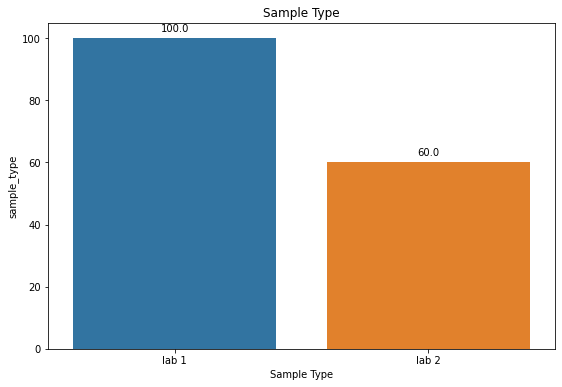

In [13]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
fig = sns.barplot(x=sample.index,y=sample, data=df )
for p in fig.patches:
    fig.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Sample Type')
plt.xlabel('Sample Type')

### Target

In [14]:
df.groupby(['target']).size().sort_values(ascending = False)

target
4.62    7
4.66    6
4.84    5
4.89    5
4.63    5
       ..
4.81    1
4.59    1
4.78    1
4.70    1
4.13    1
Length: 72, dtype: int64

In [15]:
targets = df['target'].value_counts().sort_values(ascending = True)

In [16]:
targets

4.43    1
4.81    1
5.01    1
5.08    1
4.14    1
       ..
4.84    5
4.89    5
4.63    5
4.66    6
4.62    7
Name: target, Length: 72, dtype: int64

Text(0.5, 0, 'Target')

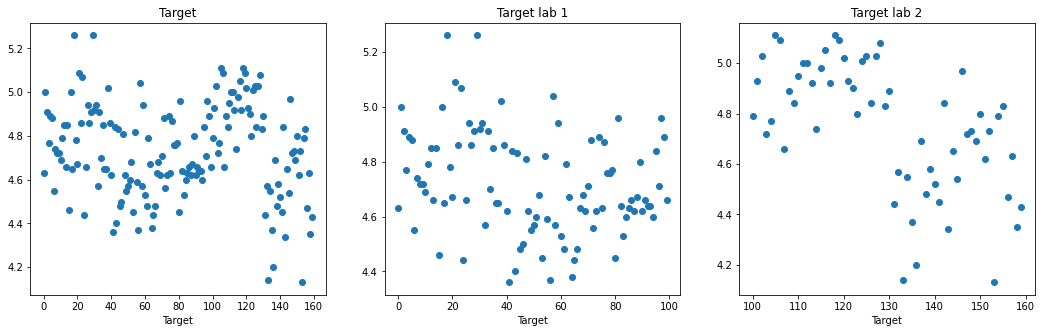

In [17]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['target'].index, df['target'])
plt.title('Target')
plt.xlabel('Target')
plt.subplot(1,3,2)
plt.scatter(df1['target'].index, df1['target'])
plt.title('Target lab 1')
plt.xlabel('Target')
plt.subplot(1,3,3)
plt.scatter(df2['target'].index, df2['target'])
plt.title('Target lab 2')
plt.xlabel('Target')

### V1 - V8

In [18]:
v1 = df['v1'].value_counts().sort_values(ascending = True)

Text(0.5, 1.0, 'V1 lab 2')

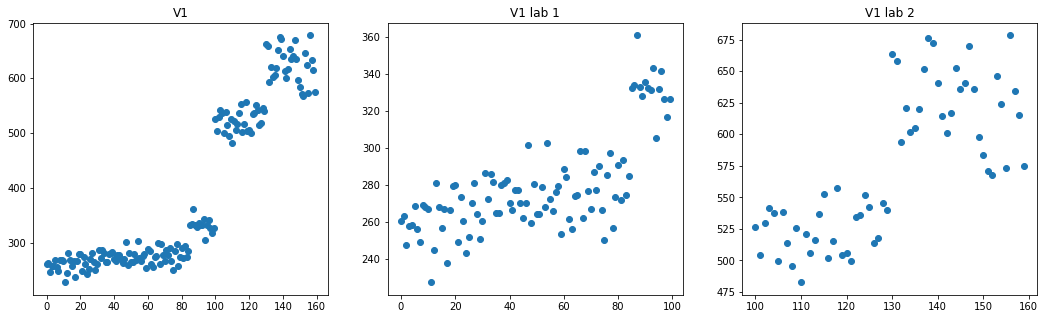

In [19]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['v1'].index, df['v1'])
plt.title('V1')
plt.subplot(1,3,2)
plt.scatter(df1['v1'].index, df1['v1'])
plt.title('V1 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v1'].index, df2['v1'])
plt.title('V1 lab 2')

Text(0.5, 1.0, 'V2 lab 2')

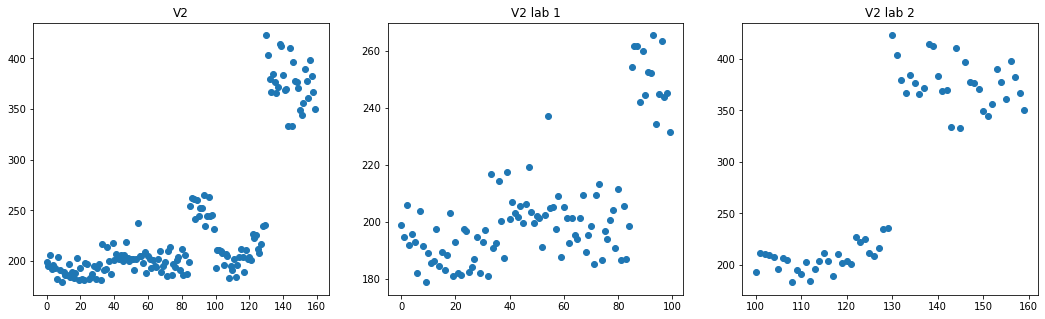

In [20]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['v2'].index, df['v2'])
plt.title('V2')
plt.subplot(1,3,2)
plt.scatter(df1['v2'].index, df1['v2'])
plt.title('V2 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v2'].index, df2['v2'])
plt.title('V2 lab 2')

Text(0.5, 1.0, 'V3 lab 2')

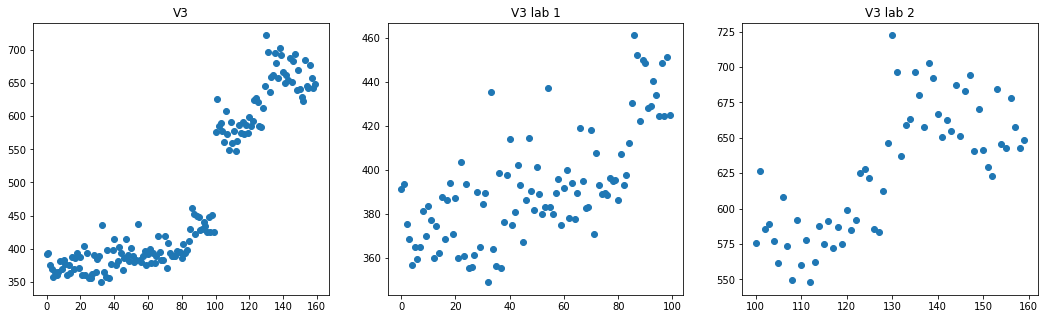

In [21]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['v3'].index, df['v3'])
plt.title('V3')
plt.subplot(1,3,2)
plt.scatter(df1['v3'].index, df1['v3'])
plt.title('V3 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v3'].index, df2['v3'])
plt.title('V3 lab 2')

Text(0.5, 1.0, 'V4 lab 2')

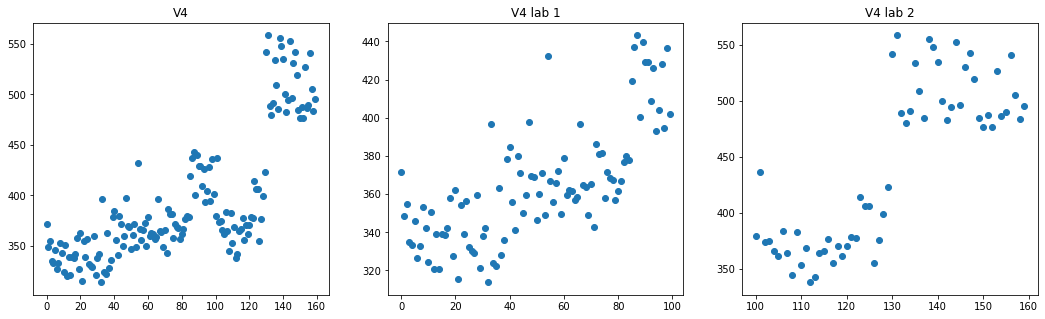

In [22]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['v4'].index, df['v4'])
plt.title('V4')
plt.subplot(1,3,2)
plt.scatter(df1['v4'].index, df1['v4'])
plt.title('V4 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v4'].index, df2['v4'])
plt.title('V4 lab 2')

Text(0.5, 1.0, 'V5 lab 2')

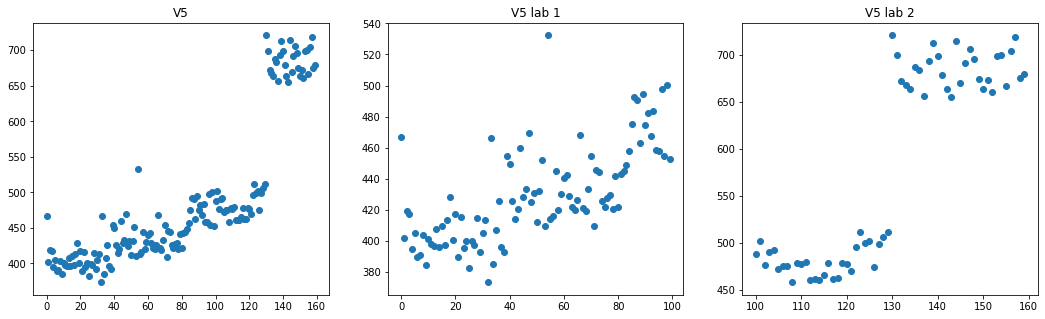

In [23]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['v5'].index, df['v5'])
plt.title('V5')
plt.subplot(1,3,2)
plt.scatter(df1['v5'].index, df1['v5'])
plt.title('V5 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v5'].index, df2['v5'])
plt.title('V5 lab 2')

Text(0.5, 1.0, 'V6 lab 2')

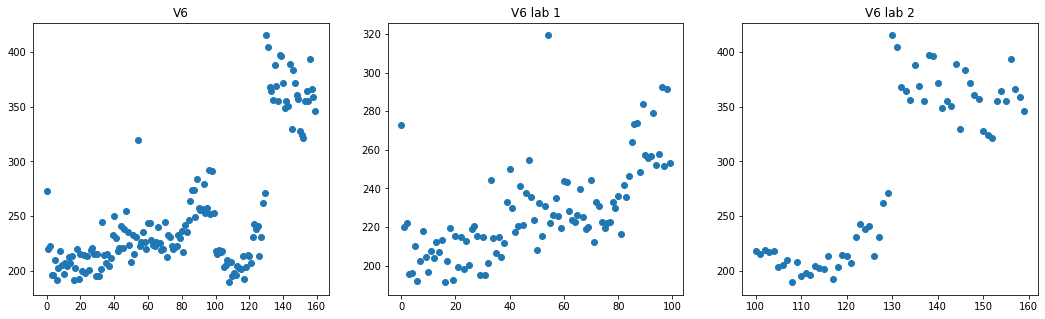

In [24]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['v6'].index, df['v6'])
plt.title('V6')
plt.subplot(1,3,2)
plt.scatter(df1['v6'].index, df1['v6'])
plt.title('V6 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v6'].index, df2['v6'])
plt.title('V6 lab 2')

Text(0.5, 1.0, 'V7 lab 2')

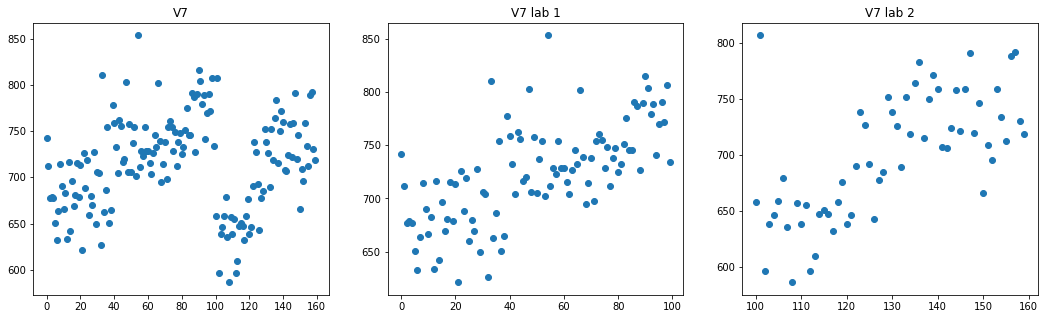

In [25]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['v7'].index, df['v7'])
plt.title('V7')
plt.subplot(1,3,2)
plt.scatter(df1['v7'].index, df1['v7'])
plt.title('V7 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v7'].index, df2['v7'])
plt.title('V7 lab 2')

Text(0.5, 1.0, 'V8 lab 2')

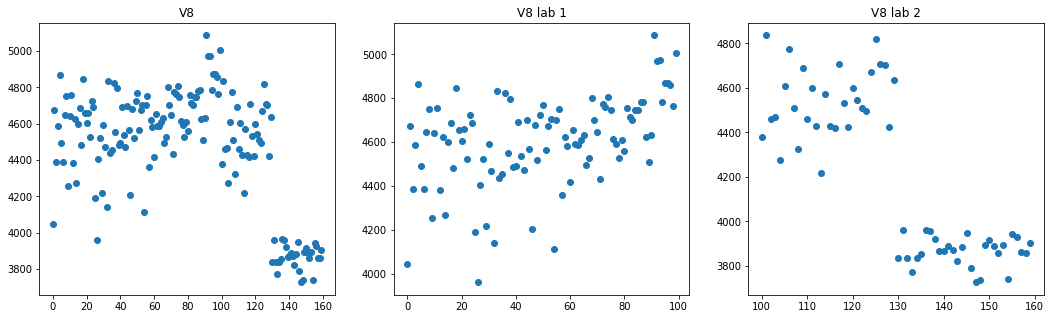

In [26]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(df['v8'].index, df['v8'])
plt.title('V8')
plt.subplot(1,3,2)
plt.scatter(df1['v8'].index, df1['v8'])
plt.title('V8 lab 1')
plt.subplot(1,3,3)
plt.scatter(df2['v8'].index, df2['v8'])
plt.title('V8 lab 2')

### Korelaasi Matrix

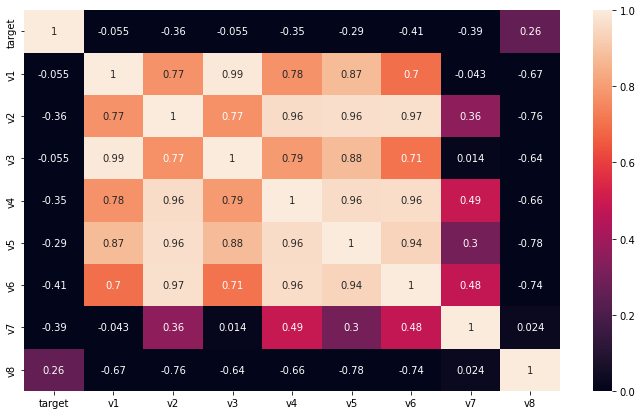

In [27]:
#korelasi matrix
corr_data = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_data, annot=True, vmin=0, vmax=1)
plt.show()

## Data Preprocessing

In [28]:
df_train_test = df
df_train_test

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1
...,...,...,...,...,...,...,...,...,...,...
155,4.83,573.250000,361.250000,643.125000,489.812500,666.875000,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.375000,398.125000,678.250000,541.125000,704.000000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.000000,382.866667,657.466667,505.066667,719.200000,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.312500,366.750000,642.937500,483.687500,675.625000,359.062500,730.125000,3859.062500,lab 2


### Feature Engineering

Setelah melakukan EDA kita mengetahui bahwa 'sample_type' hanyalah mengidentifikasikan mobil dan informasinya tidaklah penting untuk proses kedepannya. oleh karena itu saya akan menghapus column 'sample_type'

In [29]:
df_train_test.drop(columns=['sample_type'], inplace=True, axis=1)

### Handling Missing Value

In [30]:
df_train_test.isna().sum()

target    0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
dtype: int64

### Splitting Data

In [31]:
#Split between 'X' (features) and 'y' (target)
X = df_train_test.drop('target', axis=1) #axis=1 ==> column
y = df_train_test['target']
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8
0,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333
1,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667
2,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000
3,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778
4,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (128, 8)
Test Size:  (32, 8)


### Handling Outlier

#### Cek Distribusi data

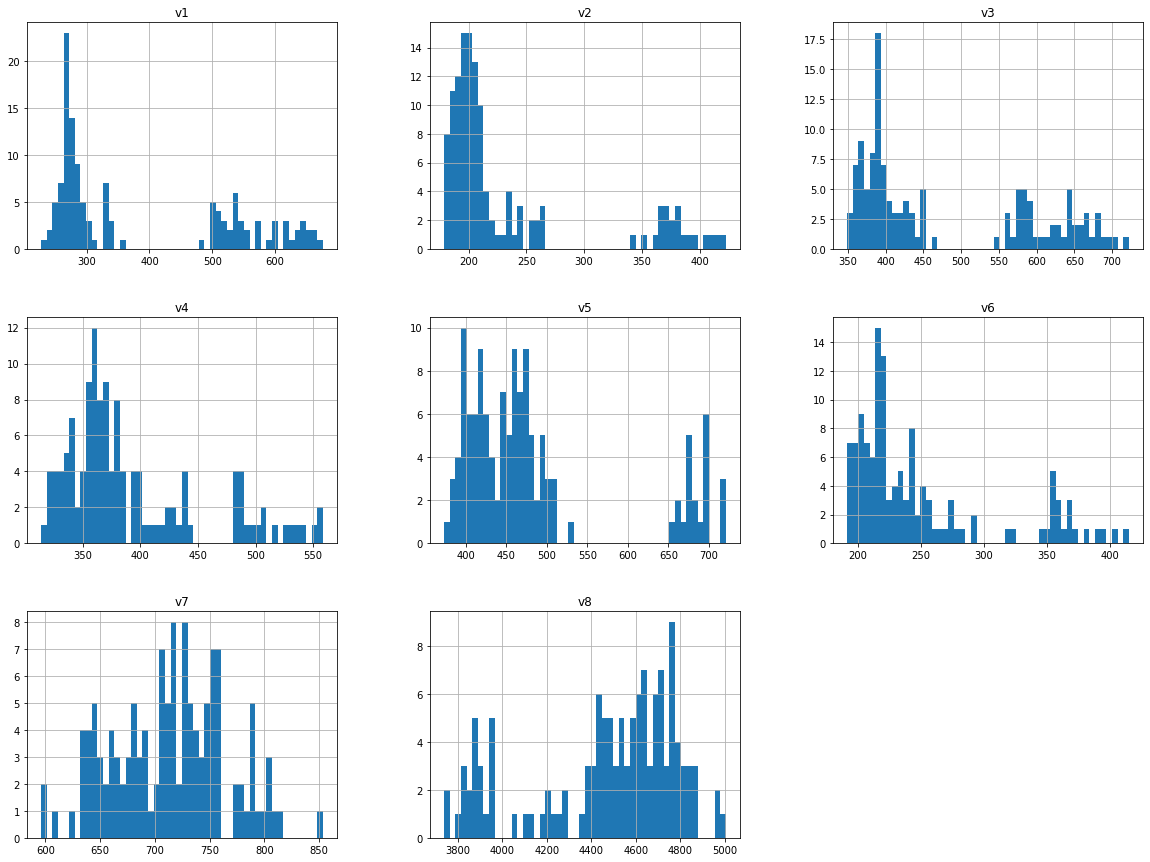

In [33]:
#cek distribution
X_train.hist(bins=50, figsize=(20, 15))
plt.show()

In [34]:
# Making a function to visualize the outliers and graph
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [35]:
# Function mencari outlier
def upper_lower(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_bound = df[col].quantile(0.75) + 1.5 * IQR
    lower_bound = df[col].quantile(0.25) - 1.5 * IQR
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [36]:
# Looping to check the Distribution of each column
dist_check = X_train.skew(numeric_only=True)

normal_dist = []
skew_dist = []
for x in range(len(dist_check)):
    if dist_check.values[x] < -0.5:
        skew_dist.append(dist_check.index[x])
    elif dist_check.values[x] > 0.5:
        skew_dist.append(dist_check.index[x])
    else:
        normal_dist.append(dist_check.index[x])

In [37]:
# Skewed distribution
print('Skewed distribution :', skew_dist)
print("")
# Normal distribution
print('Normal distribution :',normal_dist)

Skewed distribution : ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v8']

Normal distribution : ['v7']


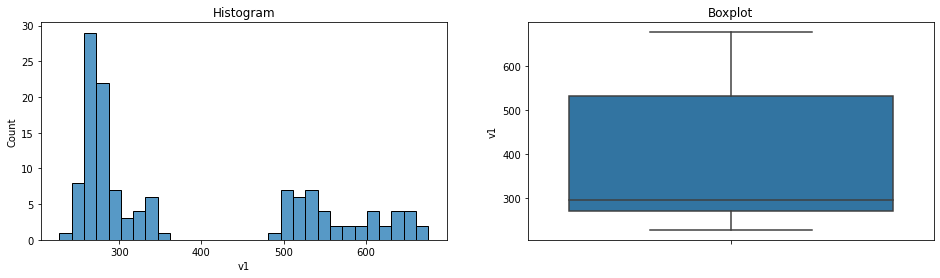

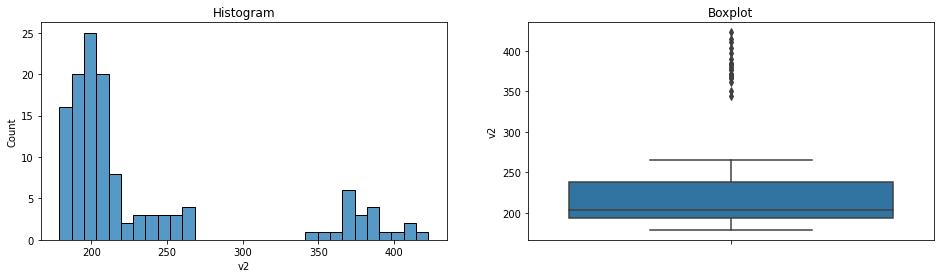

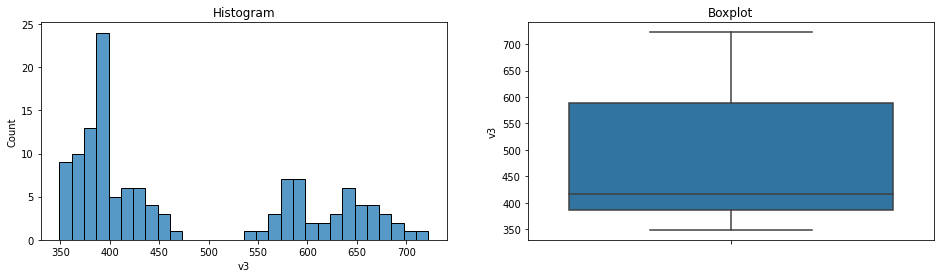

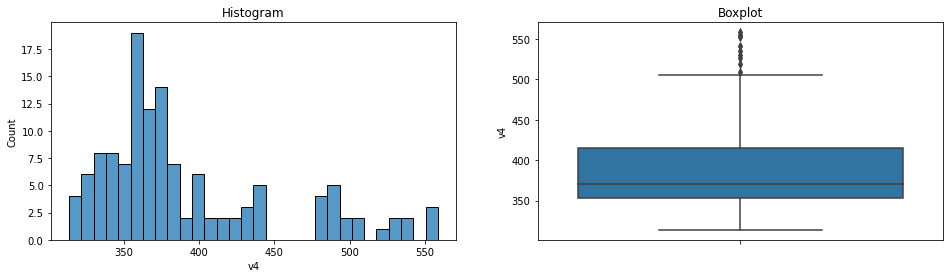

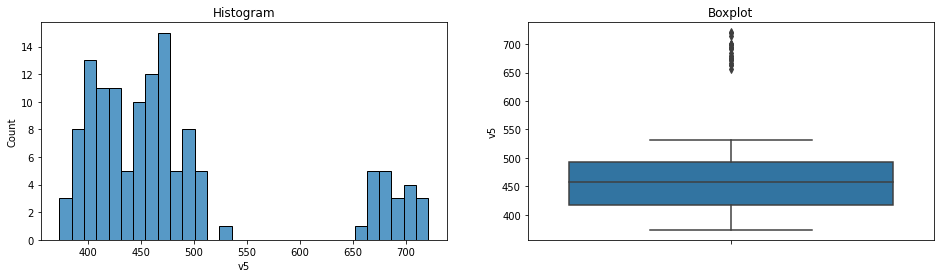

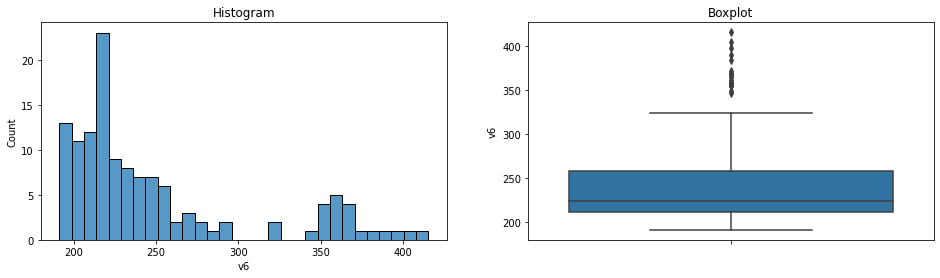

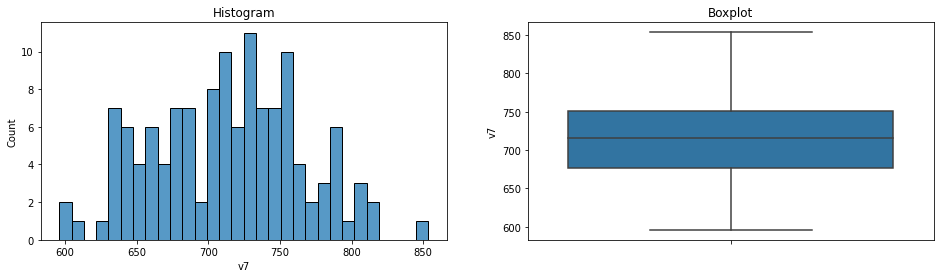

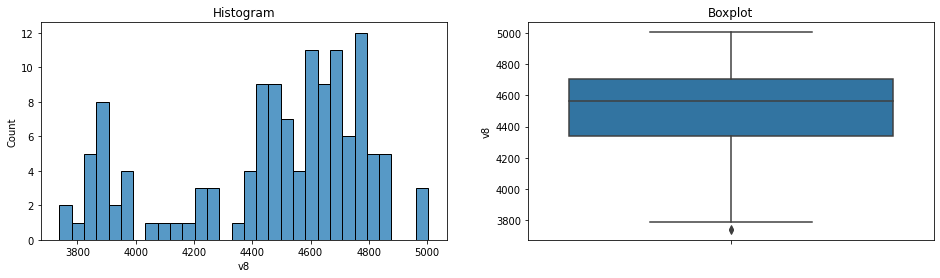

In [38]:
#Visualising the outliers
diagnostic_plots(X_train,'v1')
diagnostic_plots(X_train,'v2')
diagnostic_plots(X_train,'v3')
diagnostic_plots(X_train,'v4')
diagnostic_plots(X_train,'v5')
diagnostic_plots(X_train,'v6')
diagnostic_plots(X_train,'v7')
diagnostic_plots(X_train,'v8')

In [39]:
#Making a function to check the outliers of the data with Skewed Distributed 
def detect_skew(df, variable, distance):
    
    for i in variable:
        
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        upper_boundary_count = df[(df[variable] > upper_boundary)][variable].count()

        lower_boundary_count = df[(df[variable] < lower_boundary)][variable].count()
        
        total_count = upper_boundary_count + lower_boundary_count

        percentage = (total_count/len(df[variable])*100)

        text = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(text)

In [40]:
#Checking the outliers in the normal range
for i in skew_dist:
    detect_skew(X_train, variable=i, distance=1.5)

{'Variable': 'v1', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'v2', 'Total Outliers': 21, 'Percentage': 16.40625}
{'Variable': 'v3', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'v4', 'Total Outliers': 9, 'Percentage': 7.03125}
{'Variable': 'v5', 'Total Outliers': 21, 'Percentage': 16.40625}
{'Variable': 'v6', 'Total Outliers': 20, 'Percentage': 15.625}
{'Variable': 'v8', 'Total Outliers': 2, 'Percentage': 1.5625}


Pada bagian ini akan dilakukan handling pada untuk outlier, dimana:
- jika **outlier >0% dan outlier <15%** maka akan dilakukan **capping**
- jika **outlier >=15%** maka akan **dibiarkan**

maka feature yang akan dilakukan capping adalah variable=['v4'] karena presentase hanya 9% yang lainnya lebih dari 15% dan 0%


In [41]:
#Censoring
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both',  #Censor both the right and left end outliers
                          fold=1.5, #In normal range
                          variables=['v4','v8'])

windsoriser.fit(X_train)

X_train_cen = windsoriser.transform(X_train)

In [42]:
X_train_cen.head()

,v1,v2,v3,v4,v5,v6,v7,v8
8,269.0000,191.466667,381.2000,353.200000,403.533333,217.800000,714.533333,4751.466667
23,260.6875,197.625000,360.9375,339.125000,395.562500,198.125000,687.875000,4724.375000
94,305.2500,234.250000,434.1250,392.937500,458.500000,252.375000,741.250000,4783.437500
54,302.6000,237.200000,437.2000,432.466667,532.266667,319.333333,853.466667,4111.733333
114,536.4375,204.000000,587.4375,364.562500,460.875000,202.500000,647.125000,4573.312500


### Feature Selection 

In [43]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_cen.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_cen.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8']
Categorical Columns :  []


In [44]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train_cen[num_columns]


X_test_num = X_test[num_columns]


### Feature Scaling menggunakan Pipeline

In [45]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        
    ])
num_pipeline.fit(X_train_num)
X_train_final = num_pipeline.fit_transform(X_train_num)
X_test_final = num_pipeline.fit_transform(X_test_num)

#### Display as DataFrame


In [46]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns])
X_train_final_df

,v1,v2,v3,v4,v5,v6,v7,v8
0,-0.816225,-0.633943,-0.838988,-0.650883,-0.824977,-0.539254,0.018982,0.874342
1,-0.874032,-0.543203,-1.014226,-0.903031,-0.907603,-0.879937,-0.498003,0.789986
2,-0.564138,-0.003550,-0.381271,0.060999,-0.255191,0.059431,0.537098,0.973889
3,-0.582567,0.039916,-0.354678,0.769148,0.509477,1.218850,2.713313,-1.117591
4,1.043571,-0.449270,0.944636,-0.447328,-0.230571,-0.804181,-1.288266,0.319624
...,...,...,...,...,...,...,...,...
123,1.280881,1.614485,1.304625,1.753929,1.967675,1.295326,-0.093174,-1.809947
124,-0.484600,0.158529,-0.233168,0.840284,0.176943,0.735818,1.812186,0.909085
125,0.886234,-0.388490,0.928420,-0.616397,-0.088038,-0.609382,-1.377959,0.732578
126,-0.831872,-0.757774,-0.947201,-0.915347,-0.885575,-0.997899,-0.859197,0.674391


### Feature Importance

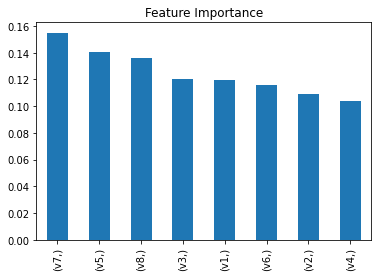

In [47]:
# Menghitung feature importance dengan menggunakan Extra trees regressor

model_fi = ExtraTreesRegressor(random_state=32) #model feature importance
model_fi.fit(X_train_final_df,y_train) # pada data X terhadap y dilakukan training (fit)
feat_importances = pd.Series(model_fi.feature_importances_, index = X_train_final_df.columns) # memasukan feature importance dengan index nama column pada data X (features)
feat_importances.nlargest(16).plot(kind='bar') # plot bar
plt.title('Feature Importance')
plt.show()

## Model Definition

Saya akan menggunakan 4 model yaitu LinearRegression,DecisionTreeRegressor,RandomForestRegressor,XGBRegressor dan membandingkan score nya untuk mencari score yang terbaik untuk dijadikan prediksi model inference.

In [48]:
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=20)
forest_reg = RandomForestRegressor(random_state=31)
xgb_reg = XGBRegressor()

## Model Training

### Linear Regression

In [49]:
lin_reg.fit(X_train_final,y_train)

LinearRegression()

In [50]:
lin_reg_predict = lin_reg.predict(X_test_final)

In [51]:
print("Mean squared error:",mean_squared_error(y_test,lin_reg_predict))
print("Mean absolute error:",mean_absolute_error(y_test,lin_reg_predict))
print("R2 score:",r2_score(y_test,lin_reg_predict))

Mean squared error: 0.042520624449441144
Mean absolute error: 0.16456118071299827
R2 score: 0.05322134706508819


### Cross Validation Linear Regression

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [53]:
scores = cross_val_score(lin_reg, X_train_final, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [54]:
display_scores(lin_rmse_scores)

Scores: [0.19745335 0.12908534 0.18290552 0.17392874 0.25342016 0.18204567
 0.22462996 0.18413901 0.18886322 0.16215508]
Mean: 0.18786260623542872
Standard deviation: 0.03181931234365971


### Desicion Tree Regressor

In [55]:
tree_reg.fit(X_train_final,y_train)

DecisionTreeRegressor(random_state=20)

In [56]:
tree_reg_predict = tree_reg.predict(X_test_final)


In [57]:
print("Mean squared error:",mean_squared_error(y_test,tree_reg_predict))
print("Mean absolute error:",mean_absolute_error(y_test,tree_reg_predict))
print("R2 score:",r2_score(y_test,tree_reg_predict))

Mean squared error: 0.08576562499999993
Mean absolute error: 0.23406249999999995
R2 score: -0.9096865099470091


### Cross Validation Desicion Tree

In [58]:
scores = cross_val_score(tree_reg, X_train_final, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [59]:
display_scores(tree_rmse_scores)

Scores: [0.27225554 0.24746406 0.19641009 0.18208198 0.26944387 0.23748684
 0.15954262 0.20678863 0.22299103 0.15832456]
Mean: 0.21527892163134005
Standard deviation: 0.039559092490643016


### Random Forest Regressor

In [60]:
forest_reg.fit(X_train_final,y_train)

RandomForestRegressor(random_state=31)

In [61]:
forest_reg_predict = forest_reg.predict(X_test_final)


In [62]:

print("Mean squared error:",mean_squared_error(y_test,forest_reg_predict))
print("Mean absolute error:",mean_absolute_error(y_test,forest_reg_predict))
print("R2 score:",r2_score(y_test,forest_reg_predict))

Mean squared error: 0.049509264375000056
Mean absolute error: 0.18132500000000026
R2 score: -0.1023900810416496


### Cross Validation Random Forest

In [63]:
scores = cross_val_score(forest_reg, X_train_final, y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [64]:
display_scores(forest_rmse_scores)

Scores: [0.19075019 0.13475345 0.18123474 0.1480897  0.27337795 0.17942735
 0.18938491 0.19378297 0.21735756 0.13908428]
Mean: 0.1847243111721526
Standard deviation: 0.03876456727575174


### Extreme Gradient Boosting Regressor

In [65]:
xgb_reg.fit(X_train_final,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [66]:
xgb_reg_predict = xgb_reg.predict(X_test_final)


In [67]:
print("Mean squared merror:",mean_squared_error(y_test,xgb_reg_predict))
print("Mean absolute error:",mean_absolute_error(y_test,xgb_reg_predict))
print("R2 score:",r2_score(y_test,xgb_reg_predict))

Mean squared merror: 0.051787001523612416
Mean absolute error: 0.18018487989902487
R2 score: -0.15310694931970614


### Cross Validation Xtreme Gradient Boosting Regressor

In [68]:
scores = cross_val_score(xgb_reg, X_train_final, y_train,
                         scoring="neg_mean_squared_error", cv=10)
xgb_rmse_scores = np.sqrt(-scores)

In [69]:
display_scores(xgb_rmse_scores)

Scores: [0.20183023 0.12178228 0.18276795 0.15978359 0.23943853 0.18533501
 0.17763099 0.21063664 0.23289012 0.15047758]
Mean: 0.186257291821273
Standard deviation: 0.03473506088246


Membandingkan MSE antar model dan mencari mana yang paling rendah (dengan cross validation)

In [70]:
print("Linear Regression Score")
display_scores(lin_rmse_scores)
print()
print("Desicion Tree Regression Score")
display_scores(tree_rmse_scores)
print()
print("Random Forest Regression Score")
display_scores(forest_rmse_scores)
print()
print("XGB Regression Score")
display_scores(xgb_rmse_scores)

Linear Regression Score
Scores: [0.19745335 0.12908534 0.18290552 0.17392874 0.25342016 0.18204567
 0.22462996 0.18413901 0.18886322 0.16215508]
Mean: 0.18786260623542872
Standard deviation: 0.03181931234365971

Desicion Tree Regression Score
Scores: [0.27225554 0.24746406 0.19641009 0.18208198 0.26944387 0.23748684
 0.15954262 0.20678863 0.22299103 0.15832456]
Mean: 0.21527892163134005
Standard deviation: 0.039559092490643016

Random Forest Regression Score
Scores: [0.19075019 0.13475345 0.18123474 0.1480897  0.27337795 0.17942735
 0.18938491 0.19378297 0.21735756 0.13908428]
Mean: 0.1847243111721526
Standard deviation: 0.03876456727575174

XGB Regression Score
Scores: [0.20183023 0.12178228 0.18276795 0.15978359 0.23943853 0.18533501
 0.17763099 0.21063664 0.23289012 0.15047758]
Mean: 0.186257291821273
Standard deviation: 0.03473506088246


## Model Improvement

Random Forest Regression Grid Search dengan Pipeline

In [71]:
pipeline_forest = Pipeline([
    ('regression',RandomForestRegressor(random_state=50))])

forest_param = { "regression__n_estimators"      : [10,20,30],
                 "regression__max_features"      : ["sqrt", "log2"],
                 "regression__min_samples_split" : [2,4,8],
                 "regression__bootstrap": [True, False],}


In [72]:
forest_model = pipeline_forest.fit(X_train_final, y_train)

In [73]:
grid_forest = GridSearchCV(pipeline_forest, forest_param, cv=10, n_jobs = 1, verbose=1)

grid_forest.fit(X_train_final,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('regression',
                                        RandomForestRegressor(random_state=50))]),
             n_jobs=1,
             param_grid={'regression__bootstrap': [True, False],
                         'regression__max_features': ['sqrt', 'log2'],
                         'regression__min_samples_split': [2, 4, 8],
                         'regression__n_estimators': [10, 20, 30]},
             verbose=1)

In [74]:
#best parameter forest
print("Best parameters: ", grid_forest.best_params_)

Best parameters:  {'regression__bootstrap': True, 'regression__max_features': 'log2', 'regression__min_samples_split': 4, 'regression__n_estimators': 20}


In [75]:
grid_forest.best_estimator_

Pipeline(steps=[('regression',
                 RandomForestRegressor(max_features='log2', min_samples_split=4,
                                       n_estimators=20, random_state=50))])

## Model Evaluation

In [76]:
#Predict train set and test set random_forest hyperparameter
y_pred_train_forest_grid = grid_forest.predict(X_train_final)
y_pred_test_forest_grid = grid_forest.predict(X_test_final)

In [77]:
print('MAE Train-Set  : ', mean_absolute_error(y_train, y_pred_train_forest_grid))
print('MAE Test-Set  : ', mean_absolute_error(y_test, y_pred_test_forest_grid))
print()
print('MSE Train-Set  : ', mean_squared_error(y_train, y_pred_train_forest_grid))
print('MSE Test-Set  : ', mean_squared_error(y_test, y_pred_test_forest_grid))
print()
print('RMSE Train-Set  : ', np.sqrt(mean_squared_error(y_train, y_pred_train_forest_grid)))
print('RMSE Test-Set  : ', np.sqrt(mean_squared_error(y_test, y_pred_test_forest_grid)))
print()
print('R2 Train-Set  : ', r2_score(y_train, y_pred_train_forest_grid))
print('R2 Test-Set  : ', r2_score(y_test, y_pred_test_forest_grid))

MAE Train-Set  :  0.06771712944173877
MAE Test-Set  :  0.17835244915674592

MSE Train-Set  :  0.007761658602453845
MSE Test-Set  :  0.04517616699625339

RMSE Train-Set  :  0.08810027583642314
RMSE Test-Set  :  0.21254685835423065

R2 Train-Set  :  0.8220091857808862
R2 Test-Set  :  -0.005907864413726038


### Model Saving

In [78]:
# Model Saving

import json

with open('model_forest_tuning.pkl', 'wb') as file_model:
  pickle.dump(grid_forest, file_model)

with open('scaler.pkl', 'wb') as file_scaler:
  pickle.dump(num_pipeline, file_scaler)

with open('list_num_cols.txt', 'w') as file_num:
  json.dump(num_columns, file_num)